In [ ]:
import warnings
from synthcity.plugins import Plugins
from synthcity.utils.datasets.time_series.google_stocks import GoogleStocksDataloader
from synthcity.plugins.core.dataloader import TimeSeriesDataLoader

warnings.filterwarnings("ignore")


eval_plugin = "ctgan"

In [2]:
# Load data
static_data, temporal_data, outcome = GoogleStocksDataloader(seq_len=4).load()
loader = TimeSeriesDataLoader(
    temporal_data=temporal_data, static_data=static_data, outcome=outcome,
)

loader.dataframe()

,temporal_open_t0,temporal_open_t1,temporal_open_t2,temporal_open_t3,temporal_high_t0,temporal_high_t1,temporal_high_t2,temporal_high_t3,temporal_low_t0,temporal_low_t1,...,temporal_close_t3,temporal_volume_t0,temporal_volume_t1,temporal_volume_t2,temporal_volume_t3,temporal_adj_close_t0,temporal_adj_close_t1,temporal_adj_close_t2,temporal_adj_close_t3,out_open_next
0,0.440125,0.465603,0.484852,0.528302,0.418534,0.452359,0.488414,0.542774,0.441343,0.493948,...,0.557997,0.061177,0.049638,0.073394,0.072471,0.445100,0.454992,0.508031,0.557997,0.147661
1,0.268700,0.217082,0.177710,0.226673,0.230277,0.203482,0.190181,0.202746,0.241507,0.224158,...,0.172436,0.174204,0.092431,0.124071,0.068364,0.211532,0.166870,0.210676,0.172436,0.097320
2,0.392843,0.445783,0.529254,0.440125,0.406953,0.492874,0.503617,0.418534,0.427048,0.483922,...,0.445100,0.046833,0.118644,0.129547,0.061177,0.430519,0.506725,0.425260,0.445100,0.149420
3,0.188567,0.272621,0.368675,0.309595,0.234726,0.334220,0.341137,0.314138,0.232991,0.308327,...,0.330479,0.099307,0.153675,0.106916,0.037867,0.255624,0.352140,0.288473,0.330479,0.110283
4,0.337752,0.381246,0.277775,0.271725,0.335635,0.339620,0.246782,0.292946,0.376828,0.316003,...,0.301000,0.037910,0.216044,0.090091,0.146776,0.359035,0.260180,0.256733,0.301000,0.105667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.396731,0.355297,0.319444,0.330682,0.366370,0.349061,0.292505,0.354438,0.389341,0.376624,...,0.373297,0.103396,0.087359,0.058793,0.070809,0.342424,0.316085,0.315218,0.373297,0.636042
89,0.149420,0.110283,0.105667,0.129095,0.111380,0.068488,0.100966,0.183909,0.148049,0.131779,...,0.201388,0.319843,0.208234,0.297676,0.373930,0.102807,0.093947,0.119605,0.201388,0.665050
90,0.250045,0.328755,0.351051,0.410366,0.309270,0.326930,0.359147,0.385739,0.264897,0.356561,...,0.315262,0.148285,0.101501,0.081510,0.147704,0.329019,0.336429,0.387493,0.315262,0.834838
91,0.181576,0.193833,0.231166,0.280554,0.163974,0.200935,0.262789,0.291565,0.217163,0.233093,...,0.318435,0.063664,0.073919,0.140144,0.046393,0.185227,0.222753,0.266965,0.318435,0.870378


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(loader)

In [4]:
# Generate new samples

syn_model.generate(count=10).dataframe()

,temporal_open_t0,temporal_open_t1,temporal_open_t2,temporal_open_t3,temporal_high_t0,temporal_high_t1,temporal_high_t2,temporal_high_t3,temporal_low_t0,temporal_low_t1,...,temporal_close_t3,temporal_volume_t0,temporal_volume_t1,temporal_volume_t2,temporal_volume_t3,temporal_adj_close_t0,temporal_adj_close_t1,temporal_adj_close_t2,temporal_adj_close_t3,out_open_next
0,0.404101,0.120322,0.126818,0.646092,0.012993,0.170457,0.360225,0.000000,0.017937,0.498750,...,0.254246,0.109117,0.310383,0.334011,0.103343,0.571557,0.200585,0.039978,0.643148,0.132812
1,0.549659,0.088589,0.834838,0.833056,0.195765,0.799583,0.836003,0.114911,0.252063,0.073642,...,0.199416,0.119160,0.047631,0.290569,0.209991,0.453705,0.696962,0.215423,0.172908,0.163488
2,0.335708,0.117891,0.334277,0.617279,0.066377,0.806027,0.014225,0.359777,0.246224,0.450898,...,0.074214,0.334849,0.121708,0.318116,0.436950,0.188098,0.240602,0.073233,0.000000,0.720404
3,0.310531,0.051182,0.234560,0.137300,0.397120,0.806027,0.289026,0.000000,0.650941,0.713405,...,0.088798,0.216279,0.073044,0.123678,0.155399,0.199372,0.460552,0.206082,0.106400,0.153521
4,0.538617,0.112627,0.385366,0.053768,0.060956,0.592682,0.302468,0.070926,0.120147,0.000000,...,0.404993,0.294022,0.177175,0.200607,0.018734,0.418022,0.100120,0.000000,0.040136,0.141906
5,0.156168,0.078823,0.432444,0.532583,0.000000,0.326952,0.084771,0.039568,0.315842,0.085146,...,0.219952,0.346414,0.014319,0.126170,0.265089,0.481868,0.554171,0.034728,0.230995,0.000000
6,0.451359,0.019842,0.316448,0.103871,0.128129,0.341692,0.106221,0.183990,0.211147,0.304836,...,0.000000,0.148926,0.174731,0.180821,0.149717,0.611643,0.561125,0.096937,0.088758,0.298936
7,0.207146,0.220892,0.834838,0.100951,0.329560,0.806027,0.438990,0.000000,0.202408,0.035544,...,0.294556,0.094925,0.083049,0.262861,0.081745,0.126021,0.188521,0.000000,0.000000,0.476847
8,0.291021,0.187276,0.779463,0.088022,0.094654,0.449565,0.270888,0.104607,0.232856,0.381297,...,0.035729,0.387402,0.921384,0.216166,0.168724,0.234411,0.470906,0.060446,0.165074,0.000000
9,0.226785,0.205751,0.283847,0.497432,0.211476,0.424864,0.089391,0.000000,0.095456,0.206577,...,0.591889,0.513176,0.241419,0.009977,0.028213,0.232104,0.346414,0.693638,0.086957,0.444229


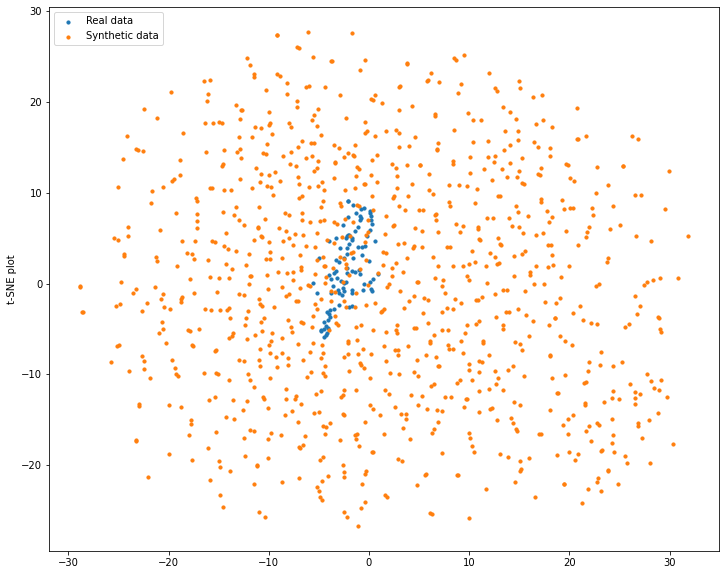

In [5]:
# plot

import matplotlib.pyplot as plt

syn_model.plot(plt, loader, count=1000, plots=["tsne"])

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate([eval_plugin], loader, task_type="time_series", repeats=2,)

In [7]:
Benchmarks.print(score)


Plugin : ctgan


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch.score,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0.0
sanity.common_rows_proportion.score,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0.01
sanity.nearest_syn_neighbor_distance.mean,0.171283,0.179572,0.175428,0.004145,0.175428,0.004145,2,0,0.0
sanity.close_values_probability.score,0.648649,0.810811,0.72973,0.081081,0.72973,0.081081,2,0,0.0
sanity.distant_values_probability.score,0.027027,0.027027,0.027027,0.0,0.027027,0.0,2,0,0.0
stats.jensenshannon_dist.marginal,0.261201,0.282235,0.271718,0.010517,0.271718,0.010517,2,0,0.15
stats.chi_squared_test.marginal,0.319836,0.359625,0.33973,0.019894,0.33973,0.019894,2,0,0.02
stats.feature_corr.joint,19.167004,19.202748,19.184876,0.017872,19.184876,0.017872,2,0,0.18
stats.inv_kl_divergence.marginal,0.534659,0.586297,0.560478,0.025819,0.560478,0.025819,2,0,0.01
stats.ks_test.marginal,0.710811,0.712973,0.711892,0.001081,0.711892,0.001081,2,0,0.01
